<a href="https://colab.research.google.com/github/0x31nose/Deep_Learning_Tutorial/blob/master/ModelSelector_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model Selector
- ニューラルネットワークを作成する
- MNISTデータセットを利用する
- フレームワークとしてはPyTorchを利用する
- PyTorchのtorchvisionパッケージを利用する

### データセットの準備と探索

In [ ]:
# torch, torchvision, torchvisionのtransformsパッケージをインポートする
# transformsには、画像（を構成する数値データ）を変換するためのクラスが含まれる
# transformsを利用すればMNISTに格納されているデータをPyTorchで使えるように変換作業を行える
import torch
import torchvision
import torchvision.transforms as transforms

# transformsに含まれるToTensorクラス、Normalizeクラスを組み合わせた
# 変換処理を行うオブジェクトを変数transformsに代入している
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# 　BATCH_SIZEとは、訓練データとテストデータから一度に何個のデータを読み込むかの値
# Irisの場合は150個だったが、MNISTは7万個あるため、学習／テストを行う際にはそれらを分割して読み込む。
BATCH_SIZE = 20

# 訓練データが正解ラベル込みで代入される
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      transform=transform, download=True)

# DataLoaderクラスのインスタンス：　trainsetに代入した値を取り出す際に利用する
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

# テストデータが正解ラベル込みで代入される
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     transform=transform, download=True)

# DataLoaderクラスのインスタンス：　testsetに代入した値を取り出す際に利用する
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)



Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


#### 上記コードのインスタンスに関する概要
##### MNISTクラスのインスタンスの引数について
- **root**: データセットファイルを置くディレクトリを指定
- **train**: 訓練データを生成するか、テストデータを生成するかを指定
- **transform**: trainset/testsetからデータを取り出す際に、MNISTの生データに対して行う処理を指定する。ここでは変数transformを指定している
- **download**: 必要に応じてインターネットからMNISTデータセットをダウンロードするかどうかを指定している

##### DataLoaderクラスのインスタンスの引数について
- **batch_size**: 一度に読み込むデータ数（バッチサイズ）を指定する
- **shuffle**: 読み込むデータをシャッフルするかどうかを指定する

In [ ]:
# みてみる
print(f'image: {len(trainset.data[0])} x {len(trainset.data[0][0])}')
for item1 in trainset.data[0]:
    for item2 in item1:
        print(f'{item2.data:4}', end='')
    print()

image: 28 x 28
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0 

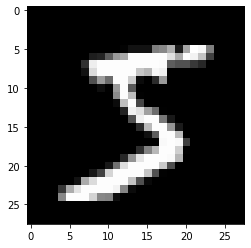

In [ ]:
# 先頭の手書き数字を表示する
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(trainset.data[0], cmap='gray')

In [ ]:
# 先頭の手書き数字に対応する正解ラベルを表示する
image, label = trainset[0]
print(label)


5


In [ ]:
# MNISTクラスのインスタンにたいして　インデックス指定を行って得た画像データを表示する

image = image.reshape(28, 28)
print()
for item1 in image:
  for item2 in item1:
    print(f' {float(item2.data):+1.2f}', end='')
  print()


 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00
 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00
 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00
 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00
 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00
 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -1.00 -0.98 -0.86 -0.86 -0.86 -0.01 +0.07 +0.37 -0.80 +0.30 +1.00 +0.94 -0.00 -1.00 -1.

### MNISTのネットワークを作成する

In [ ]:
# 全結合型で手書き文字を認識するニューラルネットワーククラス
class Net(torch.nn.Module):
  def __init__(self, INPUT_FEATURES, HIDDEN, OUTPUT_FEATURES):
    super().__init__()
    self.fc1 = torch.nn.Linear(INPUT_FEATURES, HIDDEN)
    self.fc2 = torch.nn.Linear(HIDDEN, OUTPUT_FEATURES)
  def forward(self, x):
    x = self.fc1(x)
    x = torch.nn.functional.relu(x)
    x = self.fc2(x)
    return x

In [ ]:
# Netクラスのインスタンスを生成する
INPUT_FEATURES = 28 * 28
HIDDEN = 64
OUTPUT_FEATURES = 10

net = Net(INPUT_FEATURES, HIDDEN, OUTPUT_FEATURES)

In [ ]:
# 損失関数と最適化アルゴリズムの選択
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# 学習を行う
EPOCHS = 3

for epoch in range(1, EPOCHS + 1):
  running_loss = 0.0
  for count, item in enumerate(trainloader, 1):
    inputs, labels = item
    inputs = inputs.reshape(-1, 28 * 28)

    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if count % 500 == 0:
      print(f'#{epoch}, data: {count * 20}, running_loss: {running_loss / 500:1.3f}')
      running_loss = 0.0

print('Finished')

#1, data: 10000, running_loss: 1.091
#1, data: 20000, running_loss: 0.478
#1, data: 30000, running_loss: 0.404
#1, data: 40000, running_loss: 0.361
#1, data: 50000, running_loss: 0.338
#1, data: 60000, running_loss: 0.325
#2, data: 10000, running_loss: 0.296
#2, data: 20000, running_loss: 0.299
#2, data: 30000, running_loss: 0.291
#2, data: 40000, running_loss: 0.278
#2, data: 50000, running_loss: 0.280
#2, data: 60000, running_loss: 0.281
#3, data: 10000, running_loss: 0.245
#3, data: 20000, running_loss: 0.250
#3, data: 30000, running_loss: 0.246
#3, data: 40000, running_loss: 0.232
#3, data: 50000, running_loss: 0.225
#3, data: 60000, running_loss: 0.229
Finished


In [ ]:
# 最後の訓練データを基にした推測結果と正解ラベルを比較する
_, predicted = torch.max(outputs, 1)
print(predicted)
print(labels)

tensor([6, 6, 2, 4, 1, 2, 3, 6, 4, 8, 1, 2, 2, 1, 2, 1, 2, 3, 9, 6])
tensor([5, 6, 2, 4, 1, 2, 3, 6, 4, 8, 1, 2, 2, 1, 2, 1, 2, 3, 9, 6])


In [ ]:
# ニューラルネットワークモデルをテストする
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    inputs, labels = data
    inputs = inputs.reshape(-1, 28 * 28)
    outputs = net(inputs)
    _, predicted = torch.max(outputs, 1)
    total += len(outputs)
    correct += (predicted == labels).sum().item()

print(f'correct: {correct}, accuracy: {correct} / {total} = {correct / total}')

correct: 9362, accuracy: 9362 / 10000 = 0.9362


In [ ]:
# 学習済みのモデルを保存する
# torch.save(net.state_dict(), '/content/drive/My Drive/2020/04.ACADEMIC/FederatedLearning/2.ModelSelector/ModelsDataSet/checkpoint.pth')

In [ ]:
from google.colab import files

# 学習済のモデルをロードする
files.download('checkpoint.pth')
print(state_dict.keys())

FileNotFoundError: ignored

In [ ]:
# Modelをループで任意のフォルダに保存していく関数
def ModelSave(loop):
  file_count = 1
  for i in range(loop):
    torch.save(net.state_dict(), '/content/drive/My Drive/2020/04.ACADEMIC/FederatedLearning/2.ModelSelector/ModelsDataSet/checkpoint{}.pth'.format(file_count))
    # print("checkpoint{}.pth".format(cnt))
    file_count += 1

ModelSave(3)

In [ ]:
pip install -U numpy

     |████████████████████████████████| 14.5MB 288kB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [14]:
# モデルの大量作成用ループ
import torch
import torchvision
import torchvision.transforms as transforms
import time

start = time.time()

for loop_count in range(20000, 20001):
  transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.5,), (0.5,))])

  BATCH_SIZE = 20
  trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                            transform=transform, download=True)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
  testset = torchvision.datasets.MNIST(root='./data', train=False,
                                          transform=transform, download=True)
  testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

  class Net(torch.nn.Module):
    def __init__(self, INPUT_FEATURES, HIDDEN, OUTPUT_FEATURES):
      super().__init__()
      self.fc1 = torch.nn.Linear(INPUT_FEATURES, HIDDEN)
      self.fc2 = torch.nn.Linear(HIDDEN, OUTPUT_FEATURES)
    def forward(self, x):
      x = self.fc1(x)
      x = torch.nn.functional.relu(x)
      x = self.fc2(x)
      return x

  INPUT_FEATURES = 28 * 28
  HIDDEN = 64
  OUTPUT_FEATURES = 10

  net = Net(INPUT_FEATURES, HIDDEN, OUTPUT_FEATURES)

  # 損失関数の定義
  import torch.optim as optim
  criterion = torch.nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

  # 学習
  EPOCHS = 2
  file_count = 1
  for epoch in range(1, EPOCHS + 1):
    running_loss = 0.0
    for count, item in enumerate(trainloader, 1):
      inputs, labels = item
      inputs = inputs.reshape(-1, 28 * 28)

      optimizer.zero_grad()
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      if count % 500 == 0:
        print(f'#{epoch}, data: {count * 20}, running_loss: {running_loss / 500:1.3f}')
        running_loss = 0.0
        torch.save(net.state_dict(), '/content/drive/My Drive/2020/04.ACADEMIC/FederatedLearning/2.ModelSelector/ModelsDataSet/MNISTModelData{}.pth'.format(loop_count))

print('Finished')

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
#1, data: 10000, running_loss: 1.100
#1, data: 20000, running_loss: 0.476
#1, data: 30000, running_loss: 0.398
#1, data: 40000, running_loss: 0.352
#1, data: 50000, running_loss: 0.360
#1, data: 60000, running_loss: 0.330
#2, data: 10000, running_loss: 0.317
#2, data: 20000, running_loss: 0.299
#2, data: 30000, running_loss: 0.294
#2, data: 40000, running_loss: 0.289
#2, data: 50000, running_loss: 0.280
#2, data: 60000, running_loss: 0.273
Finished


In [20]:
from google.colab import files
import torch
import numpy as np

# 学習済のモデルをロードする
# files.download('/content/drive/My Drive/2020/04.ACADEMIC/FederatedLearning/2.ModelSelector/ModelsDataSet/MNISTModelData0.pth')
# print(state_dict.keys())

the_model = torch.load('/content/drive/My Drive/2020/04.ACADEMIC/FederatedLearning/2.ModelSelector/ModelsDataSet/MNISTModelData20000.pth')
# print(the_model)

the_model

# モデルが保管されているフォルダのパス
# /content/drive/My Drive/2020/04.ACADEMIC/FederatedLearning/2.ModelSelector/ModelsDataSet/MNISTModelData0.pth

OrderedDict([('fc1.weight',
              tensor([[-0.0134, -0.0172, -0.0235,  ..., -0.0245, -0.0228,  0.0272],
                      [-0.0131,  0.0199, -0.0056,  ...,  0.0044,  0.0025,  0.0124],
                      [-0.0085, -0.0145, -0.0123,  ...,  0.0020, -0.0015,  0.0018],
                      ...,
                      [-0.0340, -0.0309,  0.0017,  ..., -0.0273,  0.0288, -0.0277],
                      [-0.0063,  0.0033, -0.0083,  ..., -0.0028, -0.0250,  0.0325],
                      [-0.0093, -0.0046, -0.0211,  ...,  0.0086, -0.0196,  0.0092]])),
             ('fc1.bias',
              tensor([-0.0161, -0.0274, -0.0057, -0.0184,  0.0018,  0.0275, -0.0197, -0.0208,
                       0.0056, -0.0005,  0.0167,  0.0290,  0.0188,  0.0225, -0.0221,  0.0278,
                      -0.0008,  0.0027, -0.0268,  0.0017,  0.0141,  0.0052,  0.0241,  0.0223,
                      -0.0147,  0.0181, -0.0025,  0.0110,  0.0122,  0.0014,  0.0231,  0.0433,
                       0.0092, -0.02

In [21]:
the_model['fc2.bias']

tensor([-0.0406,  0.0087, -0.0273,  0.1164, -0.0502, -0.0764,  0.0068,  0.0616,
         0.0870, -0.1317])

In [22]:
for i in the_model:
  print(i)

fc1.weight
fc1.bias
fc2.weight
fc2.bias


In [23]:
print(the_model["fc1.weight"])

tensor([[-0.0134, -0.0172, -0.0235,  ..., -0.0245, -0.0228,  0.0272],
        [-0.0131,  0.0199, -0.0056,  ...,  0.0044,  0.0025,  0.0124],
        [-0.0085, -0.0145, -0.0123,  ...,  0.0020, -0.0015,  0.0018],
        ...,
        [-0.0340, -0.0309,  0.0017,  ..., -0.0273,  0.0288, -0.0277],
        [-0.0063,  0.0033, -0.0083,  ..., -0.0028, -0.0250,  0.0325],
        [-0.0093, -0.0046, -0.0211,  ...,  0.0086, -0.0196,  0.0092]])


In [68]:
list = []
for i in the_model:
  ndarray = the_model[i].to('cpu').detach().numpy().copy()
  # print(ndarray)
  tensor_vector = ndarray.flatten()
  for n in tensor_vector:
    list.append(n)
  # vector.append(tensor_vector)
print(list)

[-0.013352407, -0.017189432, -0.023487875, -0.009803518, 0.011633713, -0.03092864, 0.006563821, 0.03248445, -0.031046698, -0.020259717, -0.010236648, 0.01026995, 0.020888748, 0.014651494, 0.026553387, -0.01086939, 0.023849135, 0.029988073, -0.030871838, 0.033497237, 0.0028581177, 0.011542686, -0.027657641, 0.009140386, -0.0064086714, -0.03104266, 0.006142413, -0.019613808, 0.024729013, -0.034088872, 0.030064344, 0.007210962, 0.0020758512, -0.014365663, 0.002656133, 0.006191061, 0.01778065, 0.01974449, -0.031070508, 0.001588216, 0.004722006, 0.009429903, 0.026365584, -0.018479602, -0.026394103, 0.021688418, 0.006098692, -0.025926976, -0.028947717, 0.018034708, -0.034391016, -0.0133350715, 0.005633851, -0.026210211, -0.0022441945, -0.028502055, 0.005839094, -0.030677307, -0.012909047, -0.01923302, 0.0222315, 0.03612404, 0.023625175, 0.026307348, 0.029818095, -0.0020311791, -0.026073478, 0.019830124, -0.009903384, -0.019909592, -0.036925282, -0.05002388, -0.01951715, 0.0031548026, -0.0217